## Задача линейной регрессии

Вспомним задачу линейной регрессии.

Задан датасет $(X, y)$, где 
-  $y=(y_i)_{i=1}^N \in \mathbb{R}^N$ — вектор значений целевой переменной, 
-  $X=(x_i)_{i = 1}^N \in \mathbb{R}^{N \times D}, x_i \in \mathbb{R}^D$ — матрица объектов-признаков. 

Хотим получить линейную функцию, которая будет моделировать зависимость $y_i$ от $x_i$.
$${f_w(x_i) = \langle w, x_i \rangle + w_0}$$ 

Опустим вес $w_0$ так как такую же формулу можно получить при добавлении ко всем объектам $x_i$ признака равному $1$.

Получаем: $\color{#E61129}f_w(x_i) = \langle w, x_i \rangle$

## Метод наименьших квадратов
Один из методов решения задачи линейной регрессии — метод наименьших квадратов.

В качестве функции потерь выберем $L^2$ норму (Евклидово расстояние). То есть хотим приблизить вектор таргетов и вектор ответов модели, как само "расстояние". 

С точки зрения статистики здесь выдвигается гипотеза о том, что наши данные состоят из линейной функции и нормально распределенного "шума".

$$L(f, X, y) = |y - f(X)|_2^2 = \|y - Xw\|_2^2 = \sum_{i=1}^N(y_i - \langle x_i, w \rangle)^2$$ 

Усредним этот функционал по размеру выборки для справедливой оценки:

$L(f, X, y) = \frac1N\sum_{i=1}^N(y_i - \langle x_i, w \rangle)^2$ — Mean Squared Error(MSE)

Чем меньше этот функционал, тем лучше мы приближаем $y$:
$$\color{#E61129}|y - Xw|_2^2 \longrightarrow \min_w$$

### Точный аналитический метод минимизации MSE
У нас есть функция потерь MSE: $Q(w)=||Xw-y||^2$

Распишем квадрат модуля в виде скалярного произведения:
$\vert\vert Xw - y\vert\vert^2 = \langle Xw - y, Xw - y\rangle$

Применим формулу дифференциала произведения и воспользуемся симметричностью скалярного произведения:
$$\big[D_{x_0} \langle Xw - y, Xw - y\rangle\big](h) =$$
$$= \big[D_{x_0} (Xw - y)\big](h), Xw_0 - y\rangle + \langle Xw_0 - y, \big[D_{w_0} (Xw - y)\big](h)\rangle =$$
$$= 2\langle Xw_0 - y, \big[D_{w_0} (Xw - y)\big](h)\rangle =$$
$$= 2\langle Xw_0 - y, Xh\rangle = \langle 2X^T(Xw_0 - y), h\rangle$$

Получаем:
$\nabla_{w_0} Q = 2X^T(Xw_0 - y)$

Приравняем к нулю:
$2X^T(Xw-y)=0$
$X^TXw=X^Ty$

Получаем формулу для вычисления весов:
$\color{#E61129}w=(X^TX)^{-1}X^Ty$

#### Замечания
1. Обращение матрицы. 

Для вычисления весов нам необходимо обращать матрицу $X^TX$, которая должна быть невырожденна. Эта матрица невырождена тогда и только тогда, когда ее ранг равен числу ее столбцов (если ранг меньше, то определитель равен нулю и матрица будет вырожденна)

Исходя из определения ранга матрицы, если у нас есть линейно зависимые столбцы матрицы $X$, то ранг меньше n. Следовательно, в матрице должны быть только линейно независимые признаки.

НО! Признаки могут быть *приближенно* линейно зависимыми, тогда матрица $X^TX$ будет близка к вырожденной, и это может вести к разным проблемам, в том числе, вычислительным.

2. Сложность алгоритма.

Сначала умножаем $y$  на $X^T$, а затем полученный вектор на $(X^TX)^{-1}$.

$\color{#E61129}O(D^2N + D^3)$, где $N$ — длина выборки,  $D$ — число признаков у одного объекта. 

### Приближенный метод минимизации MSE
Минимизируемый функционал MSE является **гладким и выпуклым**, значит можно найти точку минимума итеративно с помощью градиентного спуска.

Наша функция потерь:
$L(f_w, X, y) = \frac1N\vert\vert Xw - y\vert\vert^2$ 

Градиент:
$\nabla_wL = \frac2{N} X^T (Xw - y)$

Стартовав из начального приближения изменяя вектор весов в соответствии с градиентом, мы можем итеративно уменьшать значение функции потерь, пока не сойдемся к минимуму (локальному).

#### Как обновлять веса?
У нас есть стартовые значения для вектора $w$. Давайте получим ответы нашей функции для этого вектора весов, найдем градиент функции потерь.

Градиент функции в точке, показывает направление наискорейшего возрастания функции. 

То есть, для того, чтобы уменьшить минимизируемый функционал MSE, мы должны подвинуть наш вектор весов в сторону антиградиента:

$$\color{#E61129}w_{t+1}=w_{t}-\alpha \nabla_w L$$
где $\alpha$ это длина шага в сторону антиградиента. 

#### Замечания
1. Поскольку функционал выпуклый, то выбор начальной точки влияет на скорость сходимости не сильно.
2. Число обусловленности матрицы $X$ существенно влияет на скорость сходимости: чем более вытянуты эллипсоиды уровня функции потерь, тем хуже.
3. learning rate $\alpha$ также сильно влияет на поведение градиентного спуска.

#### Сложность
$\color{#E61129}O(NDS)$, где $N$ — размер выборки, $D$ — число признаков, $S$ — количество итераций.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

sns.set_palette(palette="Reds")

Сгенерируем данные для тестов:

In [86]:
n, m = 500, 2

w_true = np.random.standard_normal(m)

X = np.random.uniform(-5, 5, (n, m))
X *= (np.arange(m) * 2 + 1)[np.newaxis, :]

y = X.dot(w_true) + np.random.normal(0, 1, (n))

Изобразим на графике данные для обучения. 

По осям x и y наши два признака, а цвет обозначает величину таргета.

[Text(0.5, 0, 'X[0]'), Text(0, 0.5, 'X[1]')]

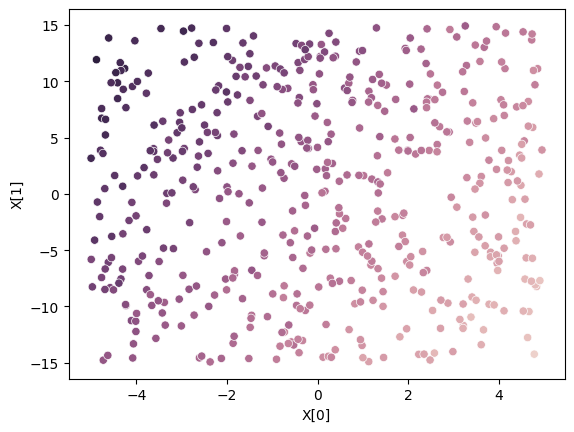

In [17]:
g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
g.legend_.remove()
g.set(xlabel="X[0]", ylabel="X[1]")

In [157]:
def gradient_descent(
    steps: int, 
    alpha: float, 
    X: np.ndarray, 
    y: np.ndarray,
    w = None,
    eps=1,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Функция для оптимизации весов с помощью градиентного спуска

    Args:
        steps (int): количество итераций
        alpha (float): длина шага
        X (np.ndarray): Матрица объектов-признаков
        y (np.ndarray): Вектор таргетов
        w (_type_, optional): Начальное значение для весов. Defaults to None.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: Возвращает полученные веса, вектор с историей весов и вектор с ошибками ответов модели на каждой итерации
    """
    n, m = X.shape[0], X.shape[1]

    if w is None:
        w = np.random.standard_normal(m)

    w_cur = w.copy()
    w_history = [w_cur]
    err_history = []
    
    for i in range(steps):
        
        y_pred = X.dot(w_cur)  # Ответы с текущими весами
        err = y_pred - y  # Ошибка
        grad = 2 * X.T.dot(err) / n  # Градиент
        if i == 0:
            print(grad)
        if np.sum(grad**2)**0.5 < eps:
            break
        w_cur -= alpha * grad  # Делаем шаг весов в сторону антиградиента

        w_history.append(w_cur.copy())
        err_history.append(err.mean())
    print(w_cur)
    return w_cur, np.array(w_history), np.array(err_history)

In [173]:
import matplotlib.pyplot as plt
import numpy as np

def plot_weight_levels(X, y, w_history: np.ndarray):
    w1_vals = np.linspace(min(w_history[:, 0]) - 1, max(w_history[:, 0]) + 1, 100)
    w2_vals = np.linspace(min(w_history[:, 1]) - 1, max(w_history[:, 1]) + 1, 100)
    
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    J_vals = np.zeros_like(W1)

    for i in range(len(w1_vals)):
        for j in range(len(w2_vals)):
            w_tmp = np.array([W1[i, j], W2[i, j]])
            J_vals[i, j] = np.mean((X.dot(w_tmp) - y) ** 2) / 2

    plt.figure(figsize=(12, 8))
    plt.contour(W1, W2, J_vals, levels=30, cmap='viridis')

    # w_history = w_history[w_history[:, 0].argsort()[::-1]]
    print(w_history[-1])
    plt.scatter(w_history[-1][0], w_history[-1][1], marker='*', s=200, color='black', label='Final Point')

    plt.plot(w_history[:, 0], w_history[:, 1], marker='o', linestyle='-', color='red', label='Gradient Descent Trajectory')

    plt.title('Weight Levels and Gradient Descent Trajectory')
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.legend()
    plt.show()

[ -41.37900522 -151.24406896]
[ 1.07881623 -0.2170744 ]
[ 1.07881623 -0.2170744 ]

[ 1.07881623 -0.2170744 ]


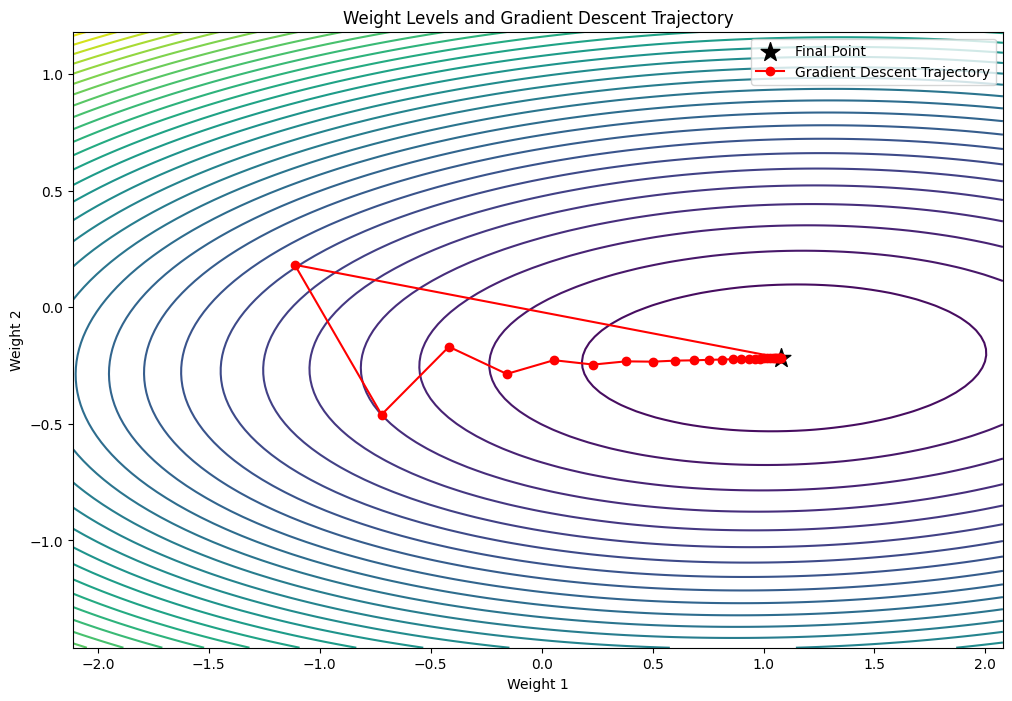

In [185]:
w, w_history, _ = gradient_descent(5000, 1e-2, X=X, y=y, eps=0.25)
print(w_history[-1])
print()
plot_weight_levels(X, y, w_history)

Градиент перпендикулярен линиям уровня. Это объясняет такие зигзагообразные траектории градиентного спуска.

### Стохастический градиентный спуск

В классическом градиентном спуске на каждом шаге берется градиент по всей выборке, что на самом деле достаточно дорого. Сложность $O(ND)$. 

**Идея:** брать градиент не по всей выборке, а лишь его оценку по какой то части — **batch**.

#### Сложность
$\color{#E61129}O(NDE)$ — выигрыш здесь идет как раз за счет того, что мы считаем градиент на батче.

In [22]:
def generate_batch(X, y, batch_size):
    """ Генератор для получения батча из данных """
    for i in range(0, len(X), batch_size):
        yield X[i : i + batch_size], y[i : i + batch_size]

In [36]:
def stochastic_gradient_descent(
    epochs: int, 
    batch_size: int, 
    alpha: float, 
    X: np.ndarray, 
    y: np.ndarray, 
    w = None,
    max_iters=1000
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Функция для оптимизации весов с помощью стохастического градиентного спуска

    Args:
        epochs (int): количество эпох
        batch_size (int): размер батча
        alpha (float): длина шага
        X (np.ndarray): Матрица объектов-признаков
        y (np.ndarray): Вектор таргетов
        w (_type_, optional): Начальное значение для вектора весов. Defaults to None.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]: Возвращает полученные веса, вектор с историей весов и вектор с ошибками ответов модели на каждой итерации
    """
    n, m = X.shape[0], X.shape[1]

    if w is None:
        w = np.random.standard_normal(m)

    w_cur = w.copy()
    w_history = [w_cur]
    err_history = []
    n_iter = 0
    for _ in range(epochs):
        p = np.random.permutation(len(X)) # случайно перемешиваем выборку
        batch_generator = generate_batch(X[p], y[p], batch_size)  # инициализируем генератор

        for X_batch, y_batch in batch_generator:  # Итерируемся по полученными батчам
            y_pred = X_batch.dot(w_cur)
            err = y_pred - y_batch
            grad = 2 * X_batch.T.dot(err) / n
            w_cur -= alpha * grad

            w_history.append(w_cur.copy())
            err_history.append(err.mean())
            n_iter += 1
            if n_iter == max_iters:
                 return w, np.array(w_history), np.array(err_history)

    return w, np.array(w_history), np.array(err_history)

In [229]:
X.shape

(500, 2)

[0.59894144 1.30741276]


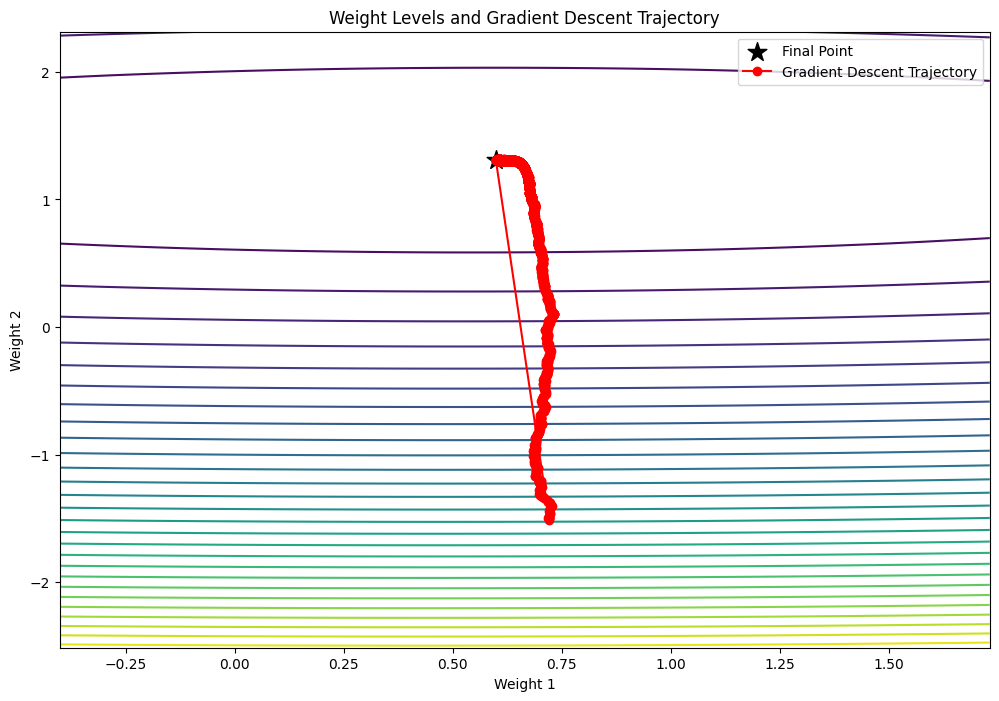

In [228]:
n, m = 500, 2

w_true = np.random.standard_normal(m)

X = np.random.uniform(-5, 5, (n, m))
X *= (np.arange(m) * 2 + 1)[np.newaxis, :]

y = X.dot(w_true) + np.random.normal(0, 1, (n))
sgd_w, sgd_w_history, _ = stochastic_gradient_descent(10, 1, 1e-2, X, y, max_iters=1000000)
plot_weight_levels(X, y, sgd_w_history)

Как видно, метод стохастического градиента «бродит» вокруг оптимума. Это объясняется подбором шага градиентного спуска $\alpha$.

Понятно, что если шаг недостаточно большой, то градиентный спуск будет сходится очень долго.
Если же шаг сделать слишком большим, то алгоритм на последних итерациях начнет "проскакивать" оптимум.

Путём подбора величины шага можно добиться лучшей скорости сходимости. Существуют методы, адаптивно подбирающие величину шага (AdaGrad, Adam, RMSProp).

#### Некеоторые улучшения SGD
1. **Всегда нужно перемешивать выборку** перед обучением, чтобы батчи были разнообразны внутри, иначе модель может то запоминать, что все таргеты маленькие, то наоборот — большие.
2. Не брать объекты на которых ошибка большая, возможно это выбросы.
3. Не брать объекты, где ошибка мала. (модель на них возможно ничему не учится)

#### Зависимость сходимости от размера подвыборки для SGD

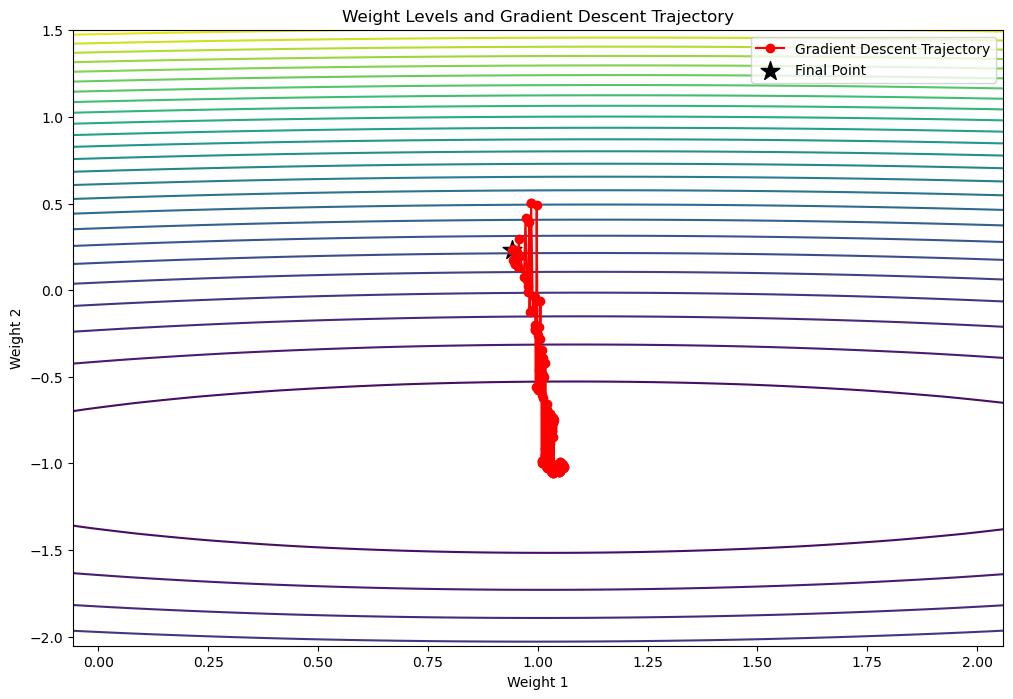

In [17]:
sgd_w, sgd_w_history, _ =stochastic_gradient_descent(1, 1, 1e-1, X, y)
plot_weight_levels(X, y, sgd_w_history)

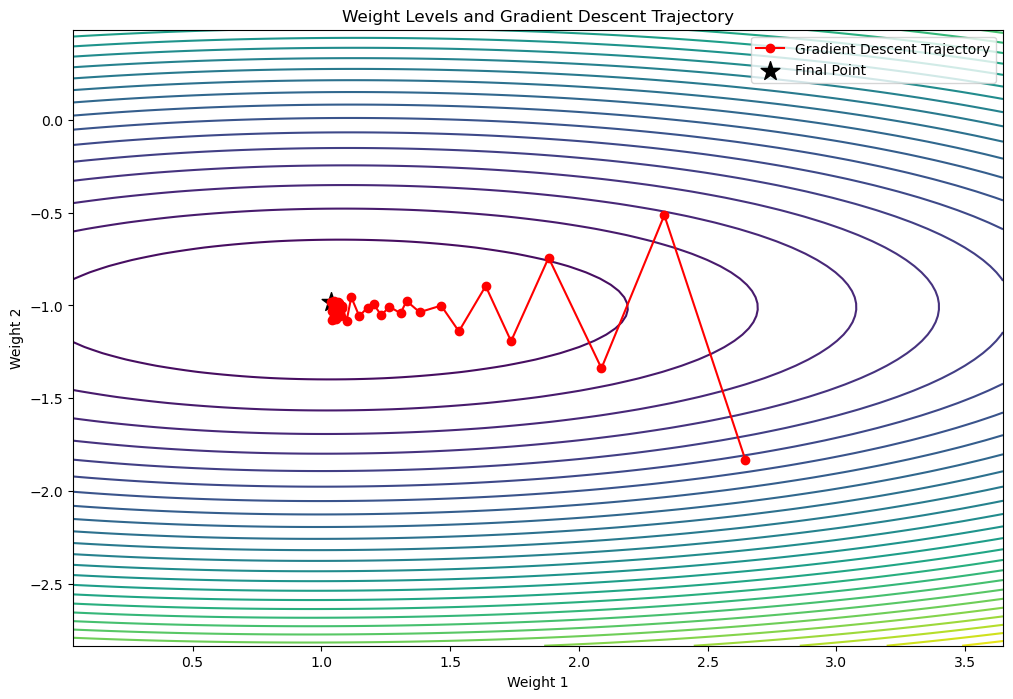

In [33]:
sgd_w, sgd_w_history, _ =stochastic_gradient_descent(5, 50, 1e-1, X, y)
plot_weight_levels(X, y, sgd_w_history)

Очевидный вывод: чем больше размер подвыборки, тем более стабильная траектория градиентного спуска.

### Сравнение скорости сходимости GD и SGD

In [34]:
w, w_history, err = gradient_descent(50, 1e-2, X, y)
sgd_w, sgd_w_history, sgd_err =stochastic_gradient_descent(5, 50, 1e-1, X, y)

In [35]:
def plot_convergence(err, sgd_err):
    plt.figure(figsize=(10, 6))
    
    plt.plot(err, label='Gradient Descent', color='blue')

    plt.plot(sgd_err, label='Stochastic Gradient Descent', color='red', linestyle='--')

    plt.title('Convergence Comparison')
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

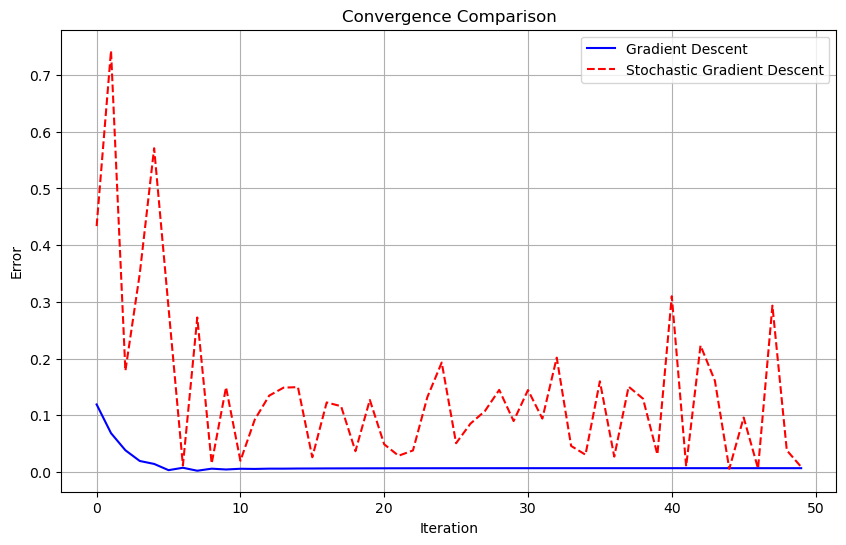

In [36]:
plot_convergence(abs(err), abs(sgd_err))

Как видно, GD буквально за несколько итераций оказывается вблизи оптимума, в то время как поведение SGD может быть весьма нестабильным.